In [1]:
from torch.utils.data import DataLoader
from hcmus.core import appconfig
from hcmus.utils import viz_utils
from hcmus.lbs import LabelStudioConnector
from hcmus.data import CroppedObjectClassificationDataset

2025-06-20 20:05:08.112 | INFO     | hcmus.core.appconfig:<module>:7 - Load DotEnv: True
/Volumes/Cucumber/Projects/item-identification/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
accepted_labels = """
8934804026817-nuoc-tuong-maggi-dau-nanh-thanh-diu-chai-700ml
8934804020402-nuoc-tuong-maggi-dau-nanh-dam-dac-700ml
8936048470524-mi-tom-3-mien-gold-vi-bo-ham-rau-thom-75g
8934822201272-bia-heineken-silver-lon-250ml
5054563022592-kem-danh-rang-sensodyne-giam-e-buotlam-sang-rang-100g
8934868166344-nuoc-rua-tay-lifebouy-450ml
8934707029182-hat-nem-knorr-thit-than-xuong-ong-va-tuy-900g
8934822361211-bia-heineken-khong-con-lon-330ml
8850006932346-kem-danh-rang-colgate-maxfresh-huong-tra-xanh-225g-+-ban-chai-long-to
8850006932322-kem-danh-rang-colgate-maxfresh-huong-bac-ha-225g-+-ban-chai-long-to
6920354827792-kem-danh-rang-colgate-maxfresh-tinh-chat-than-tre-225g-+-ban-chai-long-to
8936136163314-nuoc-mam-nam-ngu-3-trong-1-750ml
8934563198152-mi-hao-hao-chay-vi-rau-nam-74gr
8935049501503-nuoc-ngot-coca-cola-vi-nguyen-ban-lon-320ml
8936048470036-mi-3-mien-mi-chay-la-da-65g-(goi)
8935001215028-tra-tea-break-milk-350ml
8935006532755-kem-rua-mat-acnes-vitamin-lam-sang-da,-mo-seo-tham-50g
8935018801641-khan-bep-da-nang-pulppy-classic-2-lop-loc-2-cuon
8935024123287-ca-phe-sua-hoa-tan-g7-3in1-hop-336g-(16g-x-21-goi)
8935006538634-dau-tay-trang-hada-labo-sach-sau-duong-am-toi-uu-200ml
8934840000093-nuoc-khoang-chanh-lemona-chai-500ml
8997035601321-nuoc-uong-bu-dien-giai-bo-sung-ion-pocari-sweat-chai-900ml
4897036693162-nuoc-tang-luc-monster-mango-loco-355ml
809939073648-soda-sua-huong-vi-chuoi-milkis-banana
8934804038131-tra-hoa-qua-nestea-hoa-tan-hop-144g-12-goi-x-12g
8936048471248-mi-tom-chua-cay-dac-biet-3-mien-gold-goi-75g
8934804027333-tra-chanh-nestea-hoa-tan-hop-195g-15-goi-x-13g
8936010530881-tra-chanh-cozy-hoa-tan-hop-240g-16-goi-x-15g
8935049510604-nuoc-ngot-sprite-chai-320ml
8934588672118-nuoc-ngot-pepsi-khong-calo-vi-chanh-320ml
8935049501572-nuoc-ngot-fanta-vi-cam-lon-320ml
8935049500445-nuoc-ngot-fanta-chai-1.5l
8936721790017-nuoc-loc-th-true-water-chai-500ml
8935049501718-nuoc-ngot-sprite-lon-320ml
8936193070013-tra-xanh-khong-do-500ml
8935137601122-tra-xanh-thai-nguyen-100g
8934564600883-tra-den-c2-vi-dua-luoi-chai-455ml
8935001214274-tra-bi-dao-wonderfarm-lon-310ml
8934588870552-tra-olong-teaplus-450ml
6920354836930-kem-danh-rang-colgate-optic-white-cong-nghe-sac-tim-100g
8935049501374-nuoc-ngot-cocacola-vi-nguyen-ban-chai-600ml
8935039570700-ca-phe-sua-robusta-birdy-lon-170ml
8934673701402-nuoc-dao-necta-vinamilk-hop-1l
8935005801012-nuoc-loc-lavie-chai-1-5l
8936079140021-ca-phe-sua-highland-coffee-lon-185ml
8934588640445-ca-phe-sua-boss-lon-180ml
8934683008614-ca-phe-sua-vinacafe-3-in-1-gold-tui-480g-24-goi-tui
8934683008867-nuoc-tang-luc-wake-up-247-vi-ca-phe-330ml
8935328600156-tra-xanh-tui-loc-phuc-long-2g-x-hop-25-goi
4902430805322-nuoc-rua-tay-diet-khuan-safeguard-trang-tinh-khiet-450ml
8936156730718-nuoc-xa-vai-blue-dam-dac-huong-thanh-xuan-tui-3.2l
8934868166825-dau-goi-sunsilk-natural-duong-ngan-gay-rung-650g
8934804040523-tra-vai-va-huong-hoa-lai-nestea-hoa-tan-hop-144g-12-goi-x-12g
8934822801335-bia-tiger-crystal-4-6-phan-tram-lon-330ml
8934868156871-dau-xa-sunsilk-mem-muot-dieu-ky-320g
8936010530713-tra-dao-cozy-hoa-tan-hop-16-goi-x-15g
8934868171850-nuoc-lau-kinh-sunlight-sieu-nhanh-sach-trong-suot-chai-520ml
8850228003541-nuoc-tang-luc-warrior-huong-dau-chai-330ml
8936193070075-nuoc-tang-luc-number-1-chai-330ml
8934588012112-nuoc-ngot-pepsi-cola-320ml
8936013254951-nuoc-rua-kinh-gift-540ml
8934868190394-nuoc-giat-comfort-huong-hoa-anh-dao-va-dao-tuoi-tui-3kg
3068320055008-nuoc-loc-evivan-chai-500ml
8936127794206-nuoc-uong-sua-trai-cay-th-true-juice-milk-huong-viet-quat-300ml
8935049511038-sua-trai-cay-nutriboost-cam-chai-1l
8934673573399-sua-tuoi-tiet-trung-co-duong,-100%-sua-tuoivinamilk-(1lit).
3760128640607-sua-tuoi-tiet-trung-promess-nguyen-kem-hop-1l
8934822212339-bia-heineken-lon-cao-330ml
8801382123446-nuoc-gao-han-quoc-loai-500ml
8936036201604-bia-hoegaarden-rosee-chai-248ml
8934692090013-bia-1664-blanc-5%-abv-chai-330ml
8934868166870-dau-goi-sunsilk-ong-muot-rang-ngoi-chai-650g
8934588233074-nuoc-tang-luc-sting-vi-dau-tay-do-330ml
8934822431211-bia-tiger-soju-infused-lager-wonder-melon-vi-dua-luoi-lon-330ml
8934822112332-bia-tiger-lon-cao-330ml-lon
8934868180470-dau-goi-dove-biotin-ngan-gay-rung-toc-880g
8935024170519-ca-phe-trung-nguyen-legend-classic-hop-357g-17g-x-21-goi
8934868166351-nuoc-rua-tay-lifebuoy-matcha-va-lo-hoichai-450g
8936191270057-ca-phe-cappuccino-dua-just-viet-hop-hop-10-goi-x-17g
8934868166924-dau-goi-sunsilk-mem-muot-dieu-ky-chai-650g
8934804028064-ca-phe-hoa-tan-nescafe-3in1-vi-nguyen-ban-tui-782g-(17g-x-46-goi)
8936122200276-ca-phe-mr.brown-blue-mountain-240ml
8934563122201-mi-hao-hao-vi-tom-chua-cay-goi-100g
8935136865709-sua-tam-purite-duong-da-mem-min-huong-hoa-hong-rose-chai-850ml
8934822451295-nuoc-trai-cay-len-men-strongbow-vi-thom-luu-3.5%-lon-330ml
8934868170990-nuoc-rua-tay-lifebuoy-vitamin-sua-duong-am-tui-1kg
8936094291005-bia-budweiser-5-lon-330ml
8934822121297-nuoc-trai-cay-len-men-strongbow-red-beries-4.5%-abv-lon-320ml
8934822111298-nuoc-trai-cay-len-men-strongbow-gold-apple-4-5-abv-lon-320ml
8935049501190-nuoc-tra-fuze-tea-vi-chanh-sa-450ml
8936199810026-cafe-the-coffee-house-sua-da-22gx10-goi-(hop)
8888589308920-tra-bi-dao-winter-melon-jj-lon-300ml
8934673101097-sua-tuoi-tiet-trung-tiet-trung-vinamilk-khong-duong-bich-220ml
8934563183158-mi-hao-hao-sa-te-hanh-tim-75g
8936048470012-mi-3-mien-tom-chua-cay-65g
8934683009925-ca-phe-sua-da-vinacafe-chat-hop-10-goi-24g
8850228007617-nuoc-tang-luc-redbull-250ml
8934563651138-mi-hao-hao,-vi-tom-chua-cayacecook,-coc-(67g)
8934588063060-nuoc-loc-aquafina-chai-1-5l
8935049510857-nuoc-loc-dasani-chai-1.5l"""
accepted_labels = accepted_labels.splitlines()
accepted_labels = [x for x in accepted_labels if len(x) > 0]

In [3]:
splits = {}
task_exclusion = {
    "val": [4372, 4371]
}
for split_name in ["train", "test", "val"]:
    lsb_connector = LabelStudioConnector(
        url=appconfig.LABEL_STUDIO_URL,
        api_key=appconfig.LABEL_STUDIO_API_KEY,
        project_id=appconfig.LABEL_STUDIO_PROJECT_MAPPING[split_name],
        temp_dir=appconfig.LABEL_STUDIO_TEMP_DIR
    )

    exclusions = task_exclusion.get(split_name, [])

    tasks = lsb_connector.get_tasks()
    tasks = [x for x in tasks if x.id not in exclusions]
    labels = lsb_connector.extract_labels(tasks)
    dataset = lsb_connector.download_dataset(tasks, labels)
    dataset = lsb_connector.transform_labels(dataset, labels, accepted_labels)
    splits[split_name] = dataset

2025-06-20 20:05:09.553 | WARNING  | hcmus.lbs._label_studio_connector:get_tasks:148 - Page size is too large, only 3436 tasks available.
2025-06-20 20:05:09.554 | INFO     | hcmus.lbs._label_studio_connector:get_tasks:152 - New `page_to` applied: 35
Loading tasks: 100%|██████████| 35/35 [00:09<00:00,  3.65it/s]
2025-06-20 20:05:25.389 | WARNING  | hcmus.lbs._label_studio_connector:get_tasks:148 - Page size is too large, only 355 tasks available.
2025-06-20 20:05:25.390 | INFO     | hcmus.lbs._label_studio_connector:get_tasks:152 - New `page_to` applied: 4
Loading tasks: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]
2025-06-20 20:05:28.157 | WARNING  | hcmus.lbs._label_studio_connector:get_tasks:148 - Page size is too large, only 78 tasks available.
2025-06-20 20:05:28.157 | INFO     | hcmus.lbs._label_studio_connector:get_tasks:152 - New `page_to` applied: 1
Loading tasks: 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


In [4]:
train_dataset = CroppedObjectClassificationDataset(splits["train"], skip_labels=["object"])
val_dataset = CroppedObjectClassificationDataset(splits["val"], label2idx=train_dataset.label2idx, is_test=True)
# train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
# val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

2025-06-20 20:05:28.765 | INFO     | hcmus.data._torch_dataset:__init__:90 - Auto infer `label2idx` mapping, mapping length: 99.


In [5]:
len(val_dataset)

4302

In [6]:
# Load model directly
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification
from PIL import Image
import torch

processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = AutoModelForZeroShotImageClassification.from_pretrained("openai/clip-vit-base-patch32")
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

/Volumes/Cucumber/Projects/item-identification/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [7]:
def classify_image(image: Image.Image, class_names, template="a photo of a {}"):
    # Create text descriptions
    text_descriptions = [template.format(cls) for cls in class_names]

    # Process inputs
    inputs = processor(
        text=text_descriptions,
        images=image,
        return_tensors="pt",
        padding=True
    ).to(device)

    # Get predictions
    with torch.no_grad():
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image
        probs = logits_per_image.softmax(dim=1)

    # Return results
    results = {}
    for i, class_name in enumerate(class_names):
        results[class_name] = float(probs[0][i])

    return results

def print_result(predictions, metadata: dict):
    re_map = {v: k for k, v in metadata.items()}
    sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)
    for class_name, prob in sorted_predictions:
        print(f"{re_map[class_name]} - {class_name}: {prob:.3f}")

In [8]:
import json
metadata = json.load(open("/Volumes/Cucumber/Projects/item-identification/res/metadata.json"))
class2bar = {v: k for k, v in metadata.items()}
batch_size = 32
classes = list(metadata.values())

In [9]:
image, target = val_dataset[3]
print("Ground truth:", train_dataset.idx2label[target])
predictions = classify_image(image, classes)

Ground truth: 8935005801012-nuoc-loc-lavie-chai-1-5l


In [10]:
import math
def entropy(probabilities, base=2):
    return -sum(p * math.log(p, base) for p in probabilities if p > 0)

In [11]:
result = []
for i, item in enumerate(val_dataset):
    try:
        image, target = item
        ground_truth = train_dataset.idx2label.get(target, "unknown").split("-")[0]
        tmp_predictions = classify_image(image, classes)
        sorted_predictions = sorted(tmp_predictions.items(), key=lambda x: x[1], reverse=True)
        class_name, prob = sorted_predictions[0]

        result.append({
            "gt": ground_truth,
            "prob": prob,
            "pred": class_name,
            "entropy": entropy([x[1] for x in sorted_predictions])
        })

        # if train_dataset.idx2label[target].split("-")[0] != class2bar[class_name]:
        #     print(f"======== Index {i} =======")
        #     print(f"Ground truth: {train_dataset.idx2label[target]}")
        #     print(f"Prediction:   {class2bar[class_name]} {class_name}")
    except:
        print(f"Error at {i}")


The channel dimension is ambiguous. Got image shape (1, 2, 3). Assuming channels are the first dimension.


Error at 2212


In [12]:
known_result = []
unknown_result = []
for item in result:
    if item.get("gt") == "unknown":
        unknown_result.append({
            "prob": item.get("prob"),
            "entropy": item.get("entropy")
        })
    else:
        known_result.append({
            "prob": item.get("prob"),
            "entropy": item.get("entropy")
        })

In [26]:
import seaborn as sns
import pandas as pd
known_df = pd.DataFrame(known_result)
known_df["flag"] = "known"
unknown_df = pd.DataFrame(unknown_result)
unknown_df["flag"] = "unknown"

<Axes: xlabel='flag', ylabel='prob'>

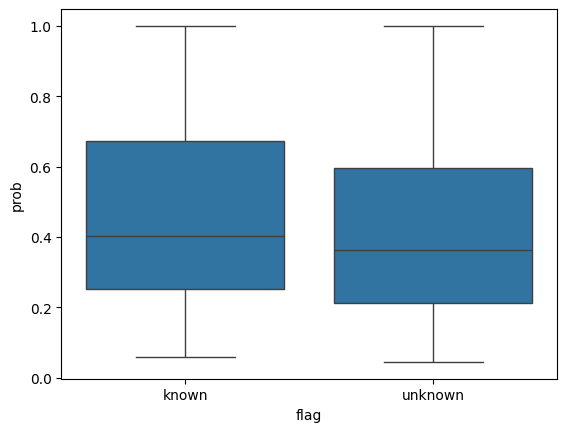

In [28]:
sns.boxplot(pd.concat([known_df, unknown_df]), x="flag", y="prob")

<Axes: xlabel='flag', ylabel='entropy'>

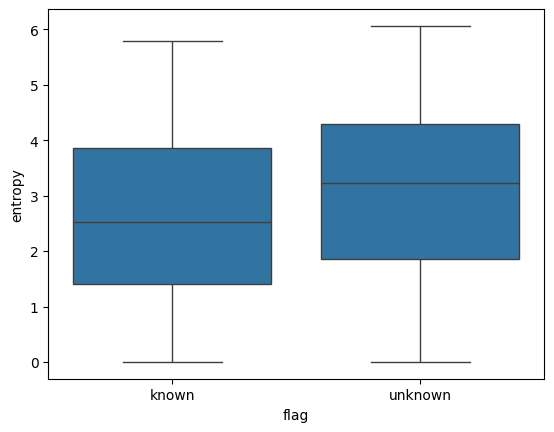

In [29]:
sns.boxplot(pd.concat([known_df, unknown_df]), x="flag", y="entropy")